# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

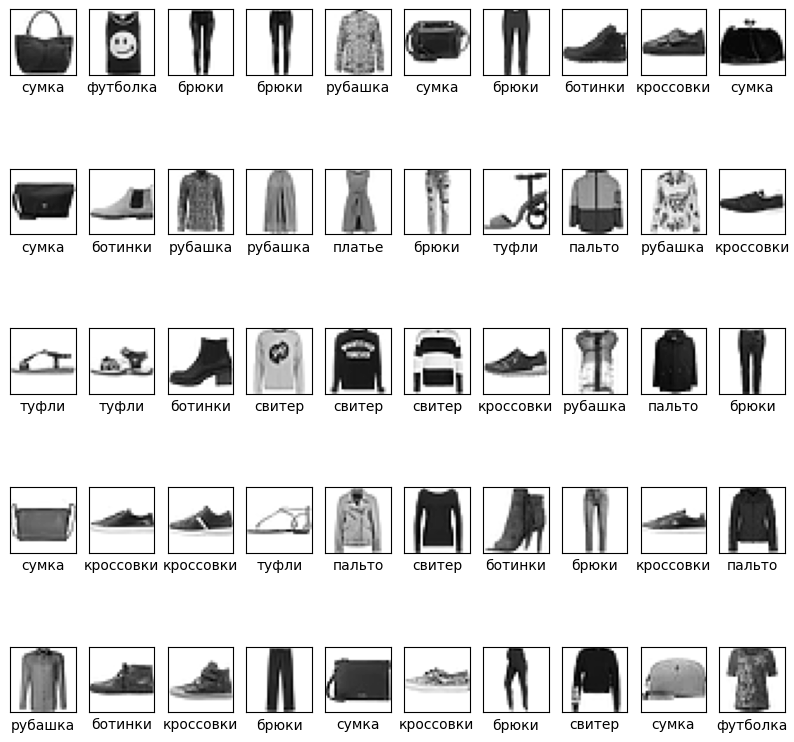

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [7]:
n = 0

In [8]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [12]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))

model.add(Dense(600, activation="relu")) # Новый скрытый слой

# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Компилируем сеть**

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           6,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,114,610 (4.25 MB)

 Trainable params: 1,114,610 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

None


## Обучаем нейронную сеть

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.5499 - loss: 1.5891 - val_accuracy: 0.7604 - val_loss: 0.7901
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7687 - loss: 0.7467 - val_accuracy: 0.7934 - val_loss: 0.6448
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7998 - loss: 0.6277 - val_accuracy: 0.8097 - val_loss: 0.5787
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8155 - loss: 0.5674 - val_accuracy: 0.8177 - val_loss: 0.5442
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8251 - loss: 0.5294 - val_accuracy: 0.8256 - val_loss: 0.5172
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8275 - loss: 0.5145 - val_accuracy: 0.8276 - val_loss: 0.5028
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8331 - loss: 0.4951 - val_accuracy: 0.8314 - val_loss: 0.4868
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8370 - loss: 0.479

## Сохраняем нейронную сеть для последующего использования

In [15]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8813 - loss: 0.3360


In [17]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 87.97


## Используем сеть для распознавания предметов одежды

In [18]:
n_rec = 496

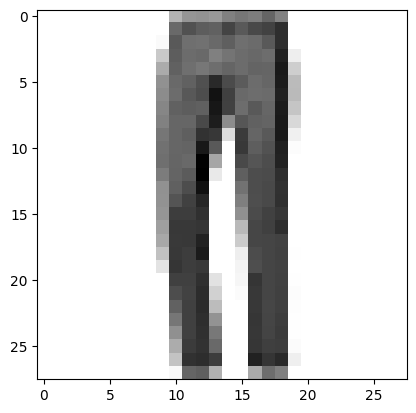

In [19]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [20]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [21]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


**Печатаем результаты распознавания**

In [22]:
prediction

array([[5.9927919e-05, 9.9991238e-01, 4.8499664e-06, 1.9608508e-05,
        2.2338852e-06, 1.7284966e-09, 7.2611670e-07, 1.7136990e-08,
        2.4565017e-07, 1.8171449e-09]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [23]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 1
Название класса: брюки


**Печатаем правильный ответ**

In [24]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 9
Название класса: ботинки


## Загружаем свою картинку

In [25]:
files.upload()

Saving штаны.jpeg to штаны.jpeg


{'штаны.jpeg': b'\xff\xd8\xff\xdb\x00\x84\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03 \x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\x

Проверяем загрузку картинки

In [26]:
!ls

fashion_mnist_dense.h5	sample_data  штаны.jpeg


Загружаем картинку из файла

In [27]:
img_path = 'штаны.jpeg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

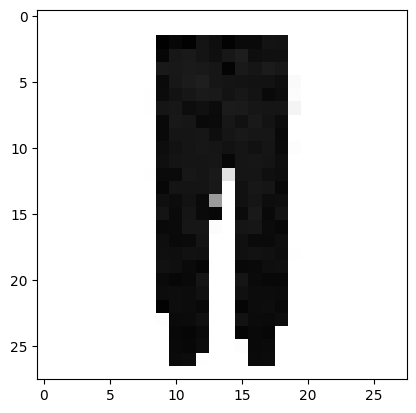

In [28]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [29]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [30]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Результаты распознавания

In [31]:
prediction

array([[1.3030467e-04, 9.9951518e-01, 6.4507544e-06, 2.9282001e-04,
        2.4842531e-05, 2.1473556e-09, 2.9816469e-05, 5.1615380e-08,
        5.5835164e-07, 6.8700795e-10]], dtype=float32)

In [32]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 1
Название класса: брюки


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.


Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.